In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

#total_data = pd.read_csv("/workspaces/Proyecto-Tutorial-de-K-Vecinos-Mas-Cercanos/data/processed/clean_data.csv")
total_data = pd.read_csv("clean_data.csv")

X = total_data.drop("tags", axis = 1)
y = total_data["tags"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,budget,homepage,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id
402,85000000,http://www.therundown.com/,10159,en,The Rundown,24.107835,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-09-26,80916492,104.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}...",Released,cut to the chase,The Rundown,6.4,514,10159
4543,500000,NaN,45145,en,Johnny Suede,1.354816,"[{""name"": ""Vega Film"", ""id"": 8138}, {""name"": ""...","[{""iso_3166_1"": ""CH"", ""name"": ""Switzerland""}, ...",1991-08-18,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Keeping up an image can be a full time job.,Johnny Suede,4.7,13,45145
3541,6500000,NaN,925,en,Do the Right Thing,15.580335,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1989-06-30,37295445,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It's the hottest day of the summer. You can do...,Do the Right Thing,7.6,292,925
2377,18000000,http://www.midnightspecialmovie.com/,245703,en,Midnight Special,32.717853,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-18,6212282,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's not like us.,Midnight Special,6.2,694,245703
4584,0,http://www.sonypictures.com/classics/dogtown/,1282,en,Dogtown and Z-Boys,3.291609,"[{""name"": ""Agi Orsi Productions"", ""id"": 794}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2001-01-18,0,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Dogtown and Z-Boys,7.2,52,1282


In [2]:
print(y_train.head())
print(y_test.head())

402     ["When Travis  the mouthy son of a criminal  d...
4543    ['A struggling young musician and devoted fan ...
3541    ["On the hottest day of the year on a street i...
2377    ['A father and son go on the run after the dad...
4584    ["Dogtown and Z-Boys follows the evolution of ...
Name: tags, dtype: object
1448    ['The impressionistic story of a Texas family ...
2932    ['An uproarious version of history that proves...
794     ["Combat has taken its toll on Rambo  but he's...
1029    ['Ground control has been receiving strange tr...
8       ["As Harry begins his sixth year at Hogwarts  ...
Name: tags, dtype: object


In [3]:
print(total_data["tags"])

0       ['In the 22nd century  a paraplegic Marine is ...
1       ['Captain Barbossa  long believed to be dead  ...
2       ['A cryptic message from Bond’s past sends him...
3       ["Following the death of District Attorney Har...
4       ["John Carter is a war-weary  former military ...
                              ...                        
4804    ['El Mariachi just wants to play his guitar an...
4805    ["A newlywed couple's honeymoon is upended by ...
4806    ['"Signed  Sealed  Delivered" introduces a ded...
4807    ['When ambitious New York attorney Sam is sent...
4808    ["Ever since the second grade when he first sa...
Name: tags, Length: 4809, dtype: object


In [4]:
print(X_train.columns)

Index(['budget', 'homepage', 'id', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'movie_id'],
      dtype='object')


In [5]:
print(total_data["tags"].isnull().sum())

0


In [6]:
# Seleccionar columnas numéricas
numeric_columns = total_data.select_dtypes(include=['int64', 'float64'])

# Imprimir el nombre de las columnas numéricas
print("Columnas numéricas:")
print(numeric_columns.columns)

Columnas numéricas:
Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'movie_id'],
      dtype='object')


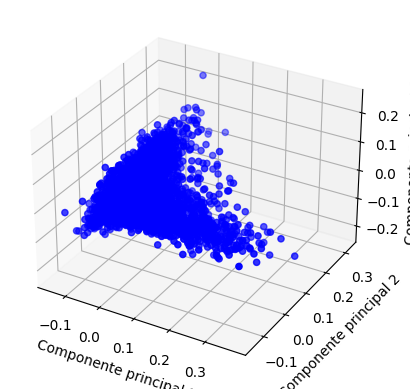

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Supongamos que tienes un DataFrame llamado 'total_data'

# 1. Vectorización TF-IDF del texto
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(total_data['tags'])

# 2. Escalado de las columnas numéricas
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(total_data[['popularity', 'revenue', 'runtime']])

# 3. Reducción de dimensionalidad de todas las características (texto y numéricas) a 3D usando PCA
pca = PCA(n_components=3)
combined_features = pca.fit_transform(tfidf_matrix.toarray())
combined_features = np.concatenate((combined_features, numeric_data_scaled), axis=1)

# 4. Graficar los puntos en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Pintar los puntos en el gráfico
ax.scatter(combined_features[:, 0], combined_features[:, 1], combined_features[:, 2], c='b', marker='o')

# Etiquetar los ejes
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')

plt.show()

In [8]:
print(total_data["tags"].isnull().sum())

0


In [9]:
# import plotly.express as px

# fig = px.scatter_3d(total_data, x="popularity", y="revenue", z="runtime", color="tags",
#                     size="popularity", color_discrete_sequence=px.colors.qualitative.Light24,
#                     width=1000, height=500)

# camera = dict(
#     up=dict(x=0, y=0, z=1),
#     eye=dict(x=-1, y=-1, z=0)
# )

# fig.update_layout(scene_camera=camera)
# fig.show()

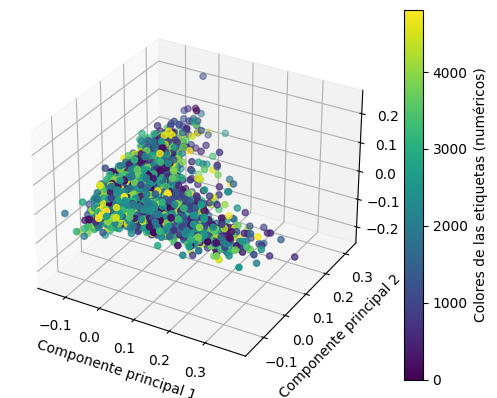

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import numpy as np

# Suprime las advertencias relacionadas con la búsqueda de la fuente
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# 1. Vectorización TF-IDF del texto
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(total_data['tags'])

# 2. Escalado de las columnas numéricas
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(total_data[['popularity', 'revenue', 'runtime']])

# 3. Reducción de dimensionalidad de todas las características (texto y numéricas) a 3D usando PCA
pca = PCA(n_components=3)
combined_features = pca.fit_transform(tfidf_matrix.toarray())
combined_features = np.concatenate((combined_features, numeric_data_scaled), axis=1)

# 4. Convertir las etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(total_data['tags'])

# 5. Graficar los puntos en 3D con colores según las etiquetas de 'tags'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Pintar los puntos en el gráfico con colores de las etiquetas de 'tags'
scatter = ax.scatter(combined_features[:, 0], combined_features[:, 1], combined_features[:, 2], c=numeric_labels, marker='o')

# Etiquetar los ejes
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')

# Añadir una barra de color
colorbar = plt.colorbar(scatter)
colorbar.set_label('Colores de las etiquetas (numéricos)')

plt.show()

In [11]:
# KNN modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(total_data["tags"])

print(tfidf_matrix)

  (0, 26429)	0.13236124036041333
  (0, 22233)	0.13816431682666044
  (0, 21160)	0.1461887761053316
  (0, 27206)	0.13322443770222797
  (0, 26890)	0.15927860685601114
  (0, 21190)	0.1062367037589865
  (0, 259)	0.10304749365218731
  (0, 22787)	0.12040745458884819
  (0, 15946)	0.11456596685226955
  (0, 20139)	0.14788131105634097
  (0, 18905)	0.0967016624522696
  (0, 1272)	0.11493372218257221
  (0, 687)	0.10803193633052771
  (0, 14674)	0.06537254401069653
  (0, 2295)	0.09038485719857454
  (0, 22686)	0.1062367037589865
  (0, 4261)	0.16253818441045398
  (0, 18594)	0.10673426550369691
  (0, 25037)	0.14316285174044605
  (0, 20822)	0.055779570069104126
  (0, 9811)	0.1341243777092439
  (0, 24974)	0.09717685994475998
  (0, 22654)	0.10913064571632511
  (0, 5016)	0.13816431682666044
  (0, 26290)	0.1429588832237282
  :	:
  (4808, 17149)	0.07085162334036517
  (4808, 10806)	0.09052254895219179
  (4808, 26487)	0.0855656377476293
  (4808, 8469)	0.08505459467969528
  (4808, 5916)	0.20688634704497688
  (480

In [12]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# fig, axis = plt.subplots(2, 3, figsize=(15, 7))

# # Eliminando la paleta fija y dejando que Seaborn use automáticamente colores únicos
# sns.scatterplot(ax=axis[0, 0], data=total_data, x="budget", y="homepage", hue="tags")
# sns.scatterplot(ax=axis[0, 1], data=total_data, x="budget", y="id", hue="tags")
# sns.scatterplot(ax=axis[0, 2], data=total_data, x="budget", y="original_language", hue="tags")
# sns.scatterplot(ax=axis[1, 0], data=total_data, x="homepage", y="id", hue="tags")
# sns.scatterplot(ax=axis[1, 1], data=total_data, x="homepage", y="original_language", hue="tags")
# sns.scatterplot(ax=axis[1, 2], data=total_data, x="id", y="original_language", hue="tags")

# plt.tight_layout()
# plt.show()

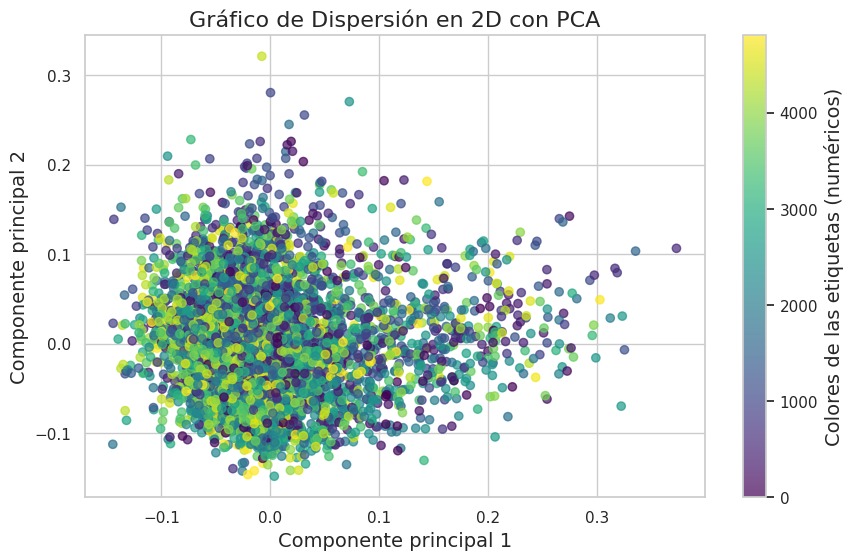

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Vectorización TF-IDF del texto
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(total_data['tags'])

# 2. Escalado de las columnas numéricas
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(total_data[['popularity', 'revenue', 'runtime']])

# 3. Reducción de dimensionalidad de todas las características (texto y numéricas) a 2D usando PCA
pca = PCA(n_components=2)
combined_features_2d = pca.fit_transform(tfidf_matrix.toarray())
combined_features_2d = np.concatenate((combined_features_2d, numeric_data_scaled), axis=1)

# 4. Convertir las etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(total_data['tags'])

# 5. Graficar el gráfico de dispersión en 2D con colores según las etiquetas de 'tags'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(combined_features_2d[:, 0], combined_features_2d[:, 1], c=numeric_labels, cmap='viridis', marker='o', alpha=0.7)

# Etiquetar los ejes
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')

# Añadir una barra de color
colorbar = plt.colorbar(scatter)
colorbar.set_label('Colores de las etiquetas (numéricos)')

plt.title('Gráfico de Dispersión en 2D con PCA')

plt.show()

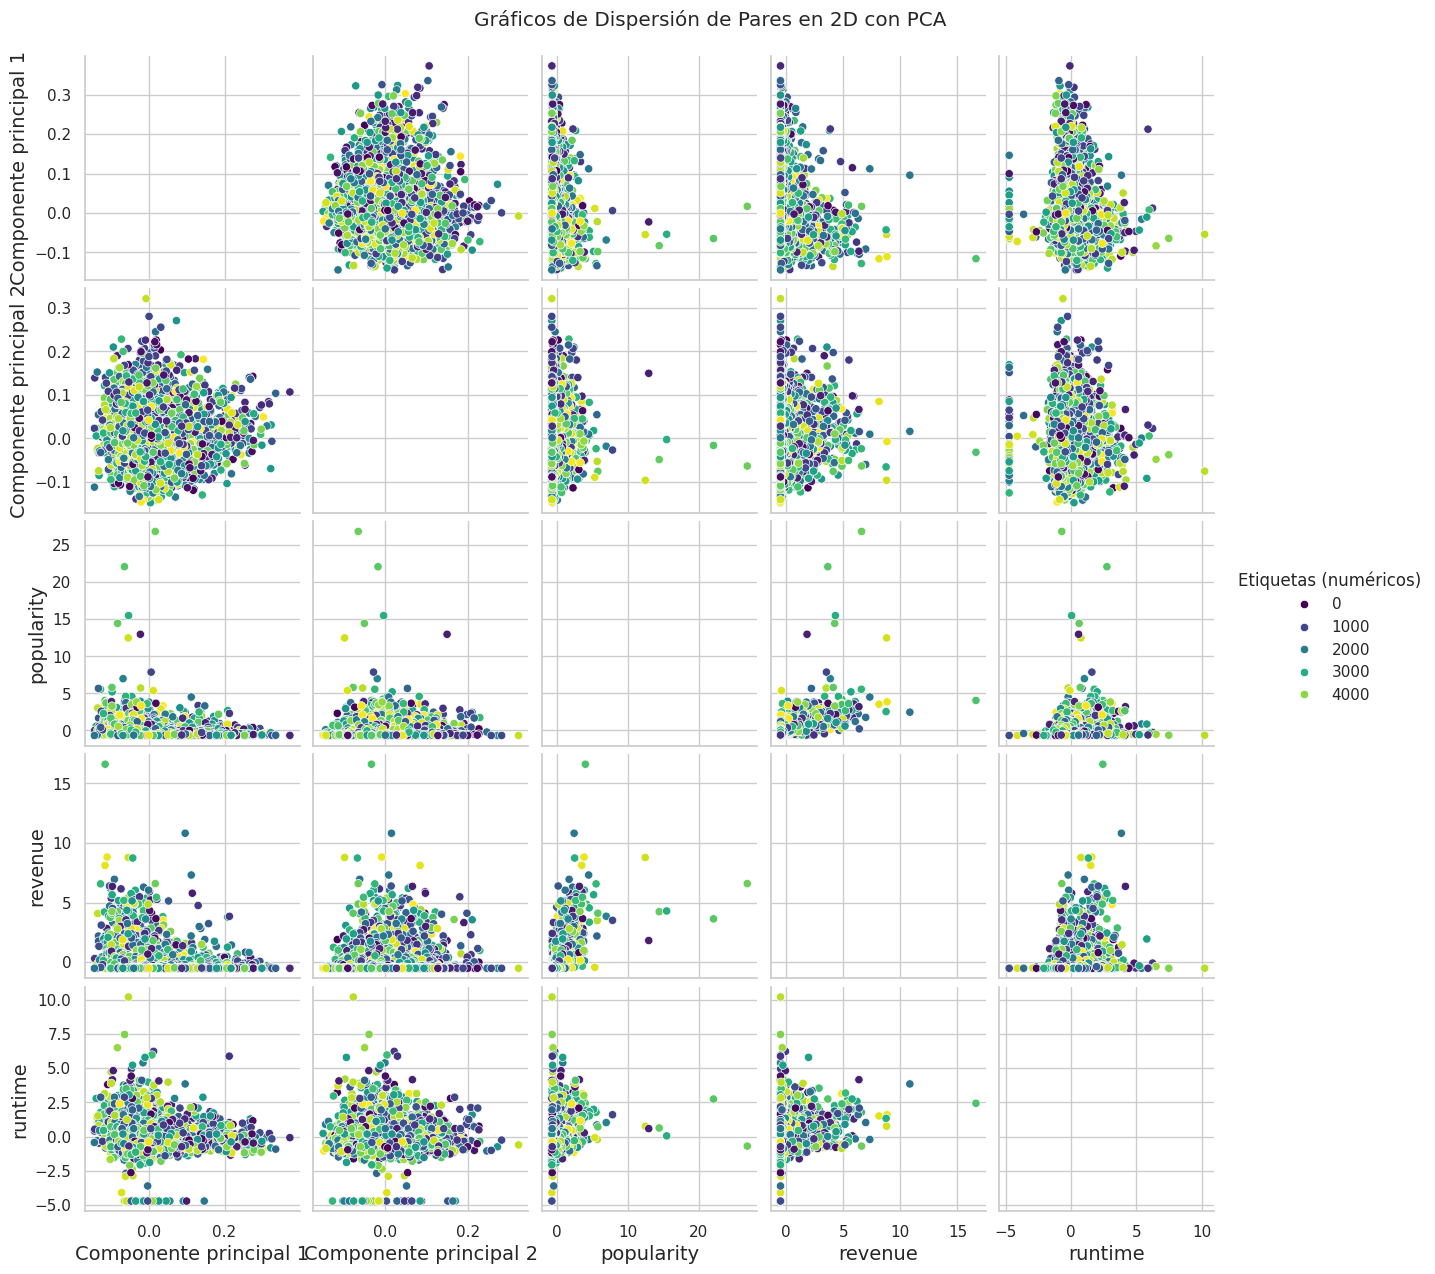

In [17]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes un DataFrame llamado 'total_data'

# 1. Vectorización TF-IDF del texto
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(total_data['tags'])

# 2. Escalado de las columnas numéricas
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(total_data[['popularity', 'revenue', 'runtime']])

# 3. Reducción de dimensionalidad de todas las características (texto y numéricas) a 2D usando PCA
pca = PCA(n_components=2)
combined_features_2d = pca.fit_transform(tfidf_matrix.toarray())
combined_features_2d = np.concatenate((combined_features_2d, numeric_data_scaled), axis=1)

# 4. Convertir las etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(total_data['tags'])

# 5. Crear un DataFrame con los datos reducidos
column_names = ['Componente principal 1', 'Componente principal 2', 'popularity', 'revenue', 'runtime']
data_2d = pd.DataFrame(combined_features_2d, columns=column_names)
data_2d['Etiquetas (numéricos)'] = numeric_labels

# 6. Graficar un par de gráficos de dispersión utilizando seaborn
sns.pairplot(data_2d, hue='Etiquetas (numéricos)', palette='viridis', markers='o', diag_kind='kde')

plt.suptitle('Gráficos de Dispersión de Pares en 2D con PCA', y=1.02)
plt.show()